# 3.3.1 Qualitative Predictors (Categorical Variables)

So far, linear regression assumed all predictors were **numbers** (age, income, height, etc.).  
But in real datasets, we often have **categorical variables**, such as:

- Gender (Male / Female)
- Region (East / West / South)
- Student status (Yes / No)
- House ownership (Own / Don't Own)

These are called **qualitative predictors**.

However, regression models require **numbers**.

So, we convert categories into numbers using **dummy variables** (also called *indicator variables* or *one-hot encoding*).


## 🔹 Case 1: A categorical variable with two categories

Example from the Credit dataset:
- `own` = Does the person own a house?  
  - Yes  
  - No  

We convert this into a dummy variable:

$$
x_i =
\begin{cases}
1 & \text{if person owns a house} \\
0 & \text{if person does not own a house}
\end{cases}
$$

Now we fit a regression model:

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

Where:

- $y_i$ = credit card balance  
- If Non-Owner ($x_i=0$): The equation becomes just $y_i = \beta_0$. So, $\beta_0$ is the average balance for non-owners.  
- If Owner ($x_i=1$): The equation becomes $y_i = \beta_0 + \beta_1$. So, owners have an average balance of $\beta_0 + \beta_1$.
- The intercept $\beta_0$: This respresent average balance of non-owners  
- The Slope ($\beta_1$): This represents the difference in balance between owners and non-owners  


## 🎯 Interpretation Example (from the Credit dataset)

From the regression output:

- Non-owners' average balance ≈ **\$509.80**  
- Owners’ additional balance (difference) ≈ **\$19.73**

So predicted balance:

- **Non-owner:**  
  $$\hat{y} = \beta_0 = 509.80$$

- **Owner:**  
  $$\hat{y} = \beta_0 + \beta_1 = 509.80 + 19.73 = 529.53$$

📌 Even though owners appear to have slightly higher balance,  
the **p-value is very large**, meaning this difference is **not statistically significant**.


## 🔁 Changing 0/1 Coding Does NOT Change Predictions

If we code:
- owner = 0  
- non-owner = 1  

The coefficients change sign, but the *predictions remain identical*.

This is because regression lines simply shift their interpretation.

✔ Predictions stay the same  
✔ Interpretation of coefficients changes  


## 🔄 Using (−1, +1) Dummy Coding

Sometimes dummy variables are coded as:

$$
x_i =
\begin{cases}
1 & \text{owner} \\
-1 & \text{non-owner}
\end{cases}
$$

Regression becomes:

$$
y_i =
\begin{cases}
\beta_0 + \beta_1 + \epsilon_i & \text{owner} \\
\beta_0 - \beta_1 + \epsilon_i & \text{non-owner}
\end{cases}
$$

Interpretation:

- $\beta_0$ = overall average balance  
- $\beta_1$ = half the difference between groups  

Still: **predicted balances remain identical**.


# 🔹 Case 2: Categorical Variable with MORE Than Two Levels

Example: `region` with 3 categories:
- East  
- West  
- South  

We cannot use a single dummy variable.  
So we create one dummy per category **minus one** (baseline group).

Example coding:

$$
x_{i1} =
\begin{cases}
1 & \text{if South} \\
0 & \text{otherwise}
\end{cases}
$$

$$
x_{i2} =
\begin{cases}
1 & \text{if West} \\
0 & \text{otherwise}
\end{cases}
$$

East becomes the **baseline** (because no dummy = East).

Regression model:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i
$$

Interpretation:
- $\beta_0$ = average balance of **East**  
- $\beta_1$ = South − East difference  
- $\beta_2$ = West − East difference  


## ✔ Example Outputs from the book (Credit dataset)

Estimated:
- East average ≈ **\$531.00**
- South difference ≈ **−\$12.50**
- West difference ≈ **−\$18.69**

Predicted balances:
- East: 531.00  
- South: 531.00 − 12.50 = 518.50  
- West: 531.00 − 18.69 = 512.31  

However…
### ❗ Both p-values are very large
Meaning:
> **No statistical evidence that regions differ in credit card balance.**

📌 The baseline choice does not affect predictions — only coefficient meanings.


In [ ]:
import pandas as pd

# Example categorical variable
df = pd.DataFrame({
    "region": ["East", "West", "South", "East", "South"]
})

# Create dummy variables (one-hot encoding)
pd.get_dummies(df, columns=["region"], drop_first=True)


,region_South,region_West
0,False,False
1,False,True
2,True,False
3,False,False
4,True,False


# ✅ Summary: Qualitative Predictors

| Type | Example | Dummy Variables Needed | Notes |
|------|---------|------------------------|-------|
| 2 categories | Yes/No | 1 | Coding (0/1 or -1/+1) changes interpretation only |
| 3 categories | East/West/South | 2 | One category becomes baseline |
| k categories | Any | k−1 | Always drop 1 to avoid multicollinearity |

📌 Always interpret coefficients relative to the **baseline** category.


# 3.3.2 Extensions of the Linear Model

The basic linear regression model assumes two big things:

1. **Additivity**  
   Variable A and Variable B effect the outcome **independently**.  
   Example: TV advertising effect is the same no matter how much radio advertising you do.

2. **Linearity**
   This relationship is a straight line.
   


# 🔹 Interaction Effects

An interaction means:
> The effect of one predictor **depends on** the level of another predictor.

Example: Peanut Butter and Jelly.

* PB is good.

* Jelly is good.

* PB AND Jelly together is better than just adding their individual "goodness" scores. They have **Synergy**.

In statistics, this synergy is called an **Interaction Effect**. We capture this by multiplying the two variables together.


## 🚫 Additive Model (No Interaction)

Standard model with two predictors:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
$$

Interpretation:
- A 1-unit increase in $X_1$ always increases $Y$ by $\beta_1$, no matter what $X_2$ is.

This may be unrealistic.


# ✔ Add Interaction Term

We include a new predictor: $X_1$ $X_2$.

Model becomes:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 (X_1 \times X_2) + \epsilon
$$

Interpretation:
- $X_1$: TV Budget
- $X_2$: Radio Budget
- $X_1 \times X_2$: The Interaction Term.
- $\beta_3$ measures how much the **effect of $X_1$** changes for different **values of $X_2$**.
- If $\beta_3$ (the interaction coefficient) is positive, it means spending on Radio actually increases the effectiveness of your TV ads
- The relationship is no longer additive.


## 🔍 Rewrite Model for Interpretation

Rewrite:

$$
Y = \beta_0 + (\beta_1 + \beta_3 X_2)X_1 + \beta_2 X_2 + \epsilon
$$

Now:

### The slope for $X_1$ is:
$$
\beta_1 + \beta_3 X_2
$$

So:
- If $X_2$ increases → the effect of $X_1$ changes.
- This confirms interaction.

Example:
- TV effectiveness increases as radio spending goes up.


# 🏭 Example: Factory Production

Predicting output using:
- number of production lines (Lines)
- number of workers

Interaction model:

$$
\text{units} = 1.2 + 3.4 \cdot \text{lines} + 0.22 \cdot \text{workers}
+ 1.4 \cdot (\text{lines} \cdot \text{workers})
$$

Meaning:
- Adding a new production line increases output by:

$$
3.4 + 1.4 \times \text{workers}
$$

So if workers = 0 → new line adds nothing.  
If workers = 10 → new line adds **3.4 + 14 = 17.4 units**.


# 📺📻 Interaction in Advertising Data

Model:

$$
\text{sales} = \beta_0 + \beta_1 TV + \beta_2 radio + \beta_3 (TV \cdot radio) + \epsilon
$$

Interpretation:
- $\beta_3$ tells us how radio boosts the effectiveness of TV (or vice versa).

The fitted model shows:
- The interaction term is **highly significant**.
- $R^2$ improves from **89.7% → 96.8%**.

This means:
> A big part of sales variability is explained by the interaction, not by TV or radio alone.


# ⚠ Hierarchical Principle (Rule of Thumb)

Even if:
- interaction term ($X_1 \times X_2$) is statistically significant (low p-value)  
- but main effects are NOT significant  

You still **must include the main effects ($X_1$ and $X_2$)**. Even if their individual p-values are weak. You can't have the synergy without the ingredients!

Why?
- Interaction terms are usually correlated with main effects.
- Removing them changes the meaning of the interaction.

Rule:
> If you include $X_1 \times X_2$, also include $X_1$ and $X_2$.


# 🎓 Example: Income and Student Status

Predicting credit card balance using:
- income (numerical)
- student (Yes/No categorical)

### Without interaction:

Parallel regression lines:

$$
\text{balance} =
\begin{cases}
\beta_0 + \beta_2 + \beta_1 \cdot \text{income} & \text{student} \\
\beta_0 + \beta_1 \cdot \text{income} & \text{non-student}
\end{cases}
$$

Both groups have:
- different intercepts  
- same slope  


# ✔ With Interaction

Add term: income × student

Model becomes:

$$
\text{balance} =
\begin{cases}
(\beta_0 + \beta_2) + (\beta_1 + \beta_3)\cdot\text{income} & \text{student} \\
\beta_0 + \beta_1\cdot\text{income} & \text{non-student}
\end{cases}
$$

Now:
- intercepts differ  
- slopes differ  
- income affects students and non-students differently  


In [ ]:
import pandas as pd

# Example dataset
df = pd.DataFrame({
    "TV": [100, 150, 200],
    "radio": [20, 30, 40]
})

# Create interaction term
df["TV_radio"] = df["TV"] * df["radio"]
df


,TV,radio,TV_radio
0,100,20,2000
1,150,30,4500
2,200,40,8000


# 2️⃣ Handling Non-Linear Relationships (Polynomial Regression)

Linear regression assumes a straight-line relationship:

$$
Y = \beta_0 + \beta_1 X
$$

But many relationships are curved.

Example: Think of fuel efficiency, i.e., miles per gallon($MPG$) vs. Horsepower ($HP$).
- Low HP = Bad MPG (engine too weak).
- Medium HP = Good MPG.
- High HP = Bad MPG (gas guzzler).
A straight line can't capture this "U" shape (or inverted). As mpg decreases non-linearly as horsepower increases. We fix this by adding powers of the variable.




# ✔ Polynomial Regression

Add non-linear terms:

$$
mpg = \beta_0 + \beta_1 \cdot horsepower + \beta_2 \cdot horsepower^2 + \epsilon
$$

This is still a *linear regression model* because it is linear in the coefficients $\beta$.

It just uses an additional predictor:
- $X_1 = horsepower$
- $X_2 = horsepower^2$


## ⚡ Example from chapter

Quadratic model gives:
- Higher $R^2 = 0.688$
- All terms significant
- Better fit than a straight line ($R^2 = 0.606$)

Going too far (5th-degree polynomial) leads to:
- A wiggly, unrealistic curve
- Overfitting


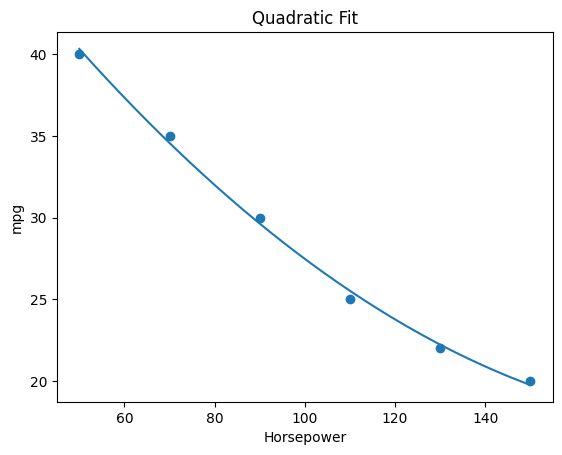

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Fake horsepower and mpg data
hp = np.array([50, 70, 90, 110, 130, 150]).reshape(-1,1)
mpg = np.array([40, 35, 30, 25, 22, 20])

# Quadratic transformation
poly = PolynomialFeatures(degree=2)
hp_poly = poly.fit_transform(hp)

model = LinearRegression()
model.fit(hp_poly, mpg)

# Plot
hp_grid = np.linspace(50, 150, 200).reshape(-1,1)
pred = model.predict(poly.transform(hp_grid))

plt.scatter(hp, mpg)
plt.plot(hp_grid, pred)
plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.title("Quadratic Fit")
plt.show()


# ✅ Summary: Extensions to Linear Regression

| Problem | Solution | Example |
|--------|----------|---------|
| Predictors influence each other | Interaction terms | TV × radio |
| Relationship is curved | Polynomial regression | horsepower² |
| Groups may behave differently | Categorical × numerical interactions | student × income |

These extensions help linear regression model more realistic patterns.


# 3.3.3 Potential Problems in Linear Regression

When fitting a linear regression model, several issues may occur that break the model’s assumptions:

1. Non-linearity between predictors and response  
2. Correlated errors  
3. Non-constant variance (heteroscedasticity)  
4. Outliers  
5. High-leverage points  
6. Collinearity among predictors  

These issues can make:
- coefficients unreliable  
- confidence intervals incorrect  
- predictions inaccurate  
- p-values misleading  



# 1️⃣ Non-Linearity

Linear regression assumes:

> Response changes in a straight-line manner with predictors.

But real data may follow curves (U-shape, exponential growth, etc.).

When the true relationship is non-linear:
- Model is biased  
- Predictions are poor  
- Residuals show patterns  


# 🔍 Detecting Non-Linearity: Residual Plots

Residual = actual − predicted

Plot:
- x-axis → fitted values $\hat{y}$
- y-axis → residuals

If the plot shows patterns (U-shape, curve, wave), the relationship is NOT linear.

Example from the chapter:
- Linear model of mpg ~ horsepower gave a U-shaped residual plot.
- Adding horsepower² removed the pattern.


# 🛠 Fixing Non-Linearity

Try transformations:

- $\log(X)$
- $\sqrt{X}$
- $X^2$, $X^3$ (polynomials)

Or use more advanced methods (later chapters):
- splines
- GAMs
- tree-based models


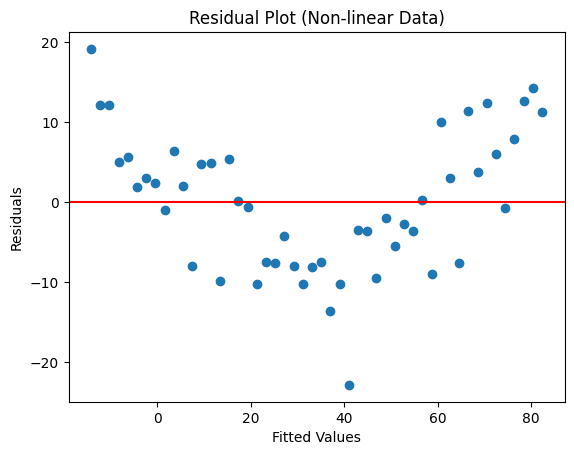

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# fake nonlinear data
x = np.linspace(0, 10, 50)
y = x**2 + np.random.randn(50)*5

model = LinearRegression()
model.fit(x.reshape(-1,1), y)
pred = model.predict(x.reshape(-1,1))

residuals = y - pred

plt.scatter(pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-linear Data)")
plt.show()


# 2️⃣ Correlation of Error Terms

The model assumes every error is random and independent. If Error #1 tells you something about Error #2, this assumption fails.

Regression assumes:

$$
\epsilon_1, \epsilon_2, ..., \epsilon_n \text{ are uncorrelated}
$$

The Analogy: An echo. The sound at time $t$ is related to the sound at time $t-1$.

What does this mean?

- Knowing one error shouldn't tell us about the next.
- Example of WRONG behavior: if one residual is positive, the next is likely positive too.

This happens especially in:
- time series data
- spatial data
- grouped data (e.g., same family, same environment)


# ⚠ Why This Is a Big Problem

If errors are correlated:

- Standard errors are underestimated  
- Confidence intervals are too narrow  
- p-values become too small  
- We wrongly think effects are significant  

This gives a FALSE sense of confidence in the model.


# 🔍 Detecting Correlation in Errors

Plot residuals vs. time (or order). If you see "tracking" (long runs of positives followed by long runs of negatives), you have correlation.

If errors are uncorrelated → no pattern.

If correlated → “tracking” occurs:
- residuals cluster together
- long runs of positive/negative residuals


# 3️⃣ Non-Constant Error Variance (Heteroscedasticity)

The model makes small errors when predicting small values, but huge errors when predicting large values.

Regression assumes:

$$
\operatorname{Var}(\epsilon_i) = \sigma^2
$$

But sometimes variance depends on the value of Y or predictors.

Symptoms:
- Small errors for small predictions
- Bigger errors for large predictions

Example: Predicting wealth.
- Predicting the wealth of a poor person: Error might be $\pm \$1,000$.
- Predicting the wealth of a billionaire: Error might be $\pm \$1,000,000,000$. - The "spread" (variance) gets wider as wealth increases.

# 🔍 Detection

Plot residuals vs fitted values.

If residuals spread out (like a megaphone 📣 or show "funnel" shape), variance is not constant.

This is a clear sign of heteroscedasticity.


# 🛠 Fixing Heteroscedasticity

Try transforming the response using:

- $\log(Y)$
- $\sqrt{Y}$
- $1/Y $

This compresses large values, reducing variance.

Or use:
- weighted least squares (WLS)
  - give lower weight to high-variance samples  


# 4️⃣ Outliers

An outlier is a point whose **response value** is far from what the model predicts.

Example:
- Data follows a line
- One point is far above/below the line → outlier

Outliers may be caused by:
- measurement errors  
- data entry mistakes  
- unusual cases  
- missing predictors  

**The Analogy**: A billionaire walks into a dive bar. The average income in the bar skyrockets, but it doesn't represent the typical customer.

**Impact**: They increase the "Residual Standard Error" (RSE), making the whole model look worse (lower $R^2$)


# 🔍 Detecting Outliers

Look at:
- residual plots  
- studentized residuals  

A studentized residual is:

$$
r_i = \frac{e_i}{\hat{\sigma}(e_i)}
$$

Rules of thumb:
- $r_i$ > 3 → possible outlier  


# 5️⃣ High-Leverage Points

Outliers have unusual Y values (an outlier is at unusual vertical distance).

High-leverage points have unusual predictor ($x$) values (a HL  is at unusual horizontal distance).

A point far from the average predictor values has **high leverage**.


# 📌 Leverage Formula (Simple Linear Regression)

$$
h_i = \frac{1}{n} +
\frac{(x_i - \bar{x})^2}{\sum_{j=1}^{n} (x_j - \bar{x})^2}
$$

Interpretation:
- $h_i$ increases as $x_i$ moves away from the center.
- Average leverage = $(p+1)/n$
- High leverage if $h_i ≫ (p+1)/n$


# ⚠ Danger of High-Leverage Points

High leverage points act like magnets. They pull the regression line toward them, potentially altering the slope significantly.

High leverage × large residual ⇒ extremely influential point.

It can:
- pull the regression line toward itself  
- change slope drastically  
- distort all inferences  

A point can have:
- low residual but high leverage → still dangerous  


# 6️⃣ Collinearity (Predictors Are Highly Correlated)

Two or more predictors provide redundant information.

Example (from Credit dataset):
- rating and limit are almost perfectly correlated

If predictors move together, regression struggles to separate their effects.


# ⚠ Effects of Collinearity

- Coefficient estimates become unstable  
- Standard errors increase  
- t-statistics shrink  
- Even important variables may appear insignificant  
- Small data changes → big coefficient changes  

Model becomes unreliable.


# 🔍 Detection Methods

1. Look at the correlation matrix  
2. Check variance inflation factors (VIF)

VIF formula:

$$
\text{VIF}(\hat{\beta_j}) = \frac{1}{1 - R^2_{X_j | X_{-j}}}
$$

Where:
- \(R^2_{X_j | X_{-j}}\) = R² from regressing predictor \(X_j\) on all others

Rules:
- VIF = 1 → no collinearity  
- VIF > 5 → moderate collinearity  
- VIF > 10 → serious collinearity  


# 🛠 Fixing Collinearity

Two simple fixes:

### 1. Drop one of the correlated predictors  
If rating and limit contain same information, keep only one.

### 2. Combine them  
Create a new variable, e.g.:

- average of standardized limit & rating  
- principal components (PCA)

This reduces redundancy.


# ⭐ MASTER SUMMARY OF SECTION 3.3

This section deals with three major themes:

1. **Qualitative Predictors (Categorical Variables)**
2. **Extensions of the Linear Model**
3. **Potential Problems and Diagnostics**

---

## 1️⃣ Qualitative Predictors (Categorical Variables)

| Type | Example | How to Encode | Interpretation |
|------|---------|----------------|----------------|
| 2 levels | Own house? (Yes/No) | 1 dummy variable | β₀ = baseline avg, β₁ = difference between levels |
| k levels | Region (East/West/South) | k–1 dummy variables | One level becomes "baseline" |
| Numeric × Categorical | Income × Student | Interaction term | Allows different slopes for groups |

---

## 2️⃣ Extensions of the Linear Model

| Problem | Solution | Interpretation |
|---------|-----------|----------------|
| Predictors work together | Add interaction \(X_1 X_2\) | Effect of one variable depends on the other |
| Curved relationships | Polynomial terms \(X^2, X^3\) | Still linear in β but models curvature |
| Groups have diff. responses | Categorical interactions | Parallel lines → separate slopes |

---

## 3️⃣ Potential Problems

| Problem | Symptom | How to Detect | Fix |
|---------|---------|----------------|-----|
| Non-linearity | Pattern in residuals | U-shape residuals | Add polynomial terms or transform X |
| Correlated errors | Sequential dependence | Residual vs. time plot | Time-series models |
| Heteroscedasticity | Funnel shape residuals | Increasing error spread | log(Y), sqrt(Y), WLS |
| Outliers | Unusual Y | Studentized residual > 3 | Remove/repair/check data |
| High leverage | Unusual X | High hᵢ > 2×avg leverage | Investigate/possibly remove |
| Collinearity | Large SE, unstable β | VIF > 10 | Drop or combine predictors |

---


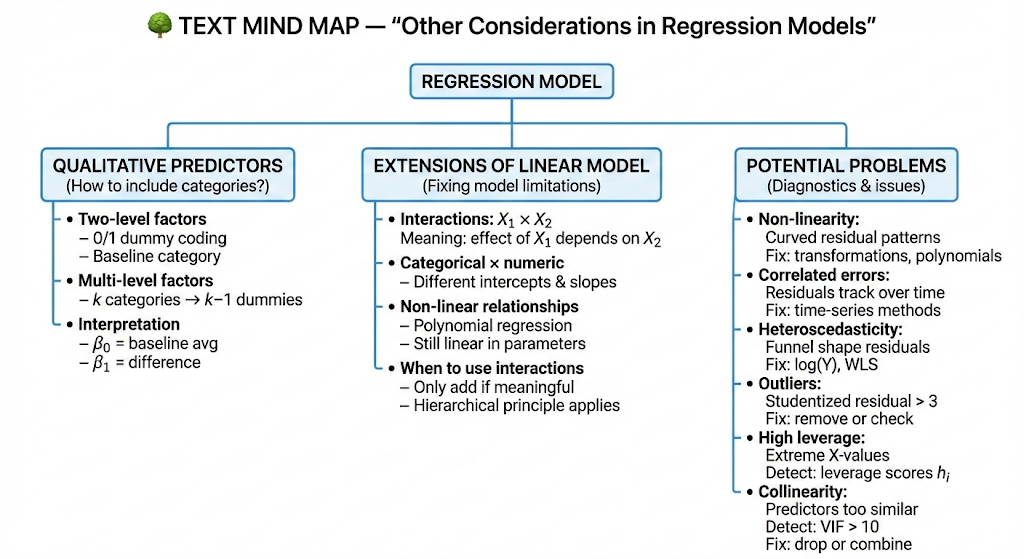

# 🧠 FORMULA CHEAT SHEET (Minimal, High-Value)

### 1. Dummy Variable (Two-Level Factor)

$$
x_i =
\begin{cases}
1 & \text{if category A} \\
0 & \text{if category B}
\end{cases}
$$

---

### 2. Interaction Term

$$
\text{Interaction} = X_1 X_2
$$

Model:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \epsilon
$$

---

### 3. Polynomial Regression

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \cdots + \epsilon
$$

---

### 4. Leverage Score (Simple Regression)

$$
h_i = \frac{1}{n} +
\frac{(x_i - \bar{x})^2}{\sum_{j=1}^{n} (x_j - \bar{x})^2}
$$

---

### 5. Variance Inflation Factor (VIF)

$$
\text{VIF}(\beta_j) = \frac{1}{1 - R^2_{X_j | X_{-j}}}
$$

Interpretation:
- VIF = 1 → no collinearity  
- VIF > 5 → moderate  
- VIF > 10 → severe  


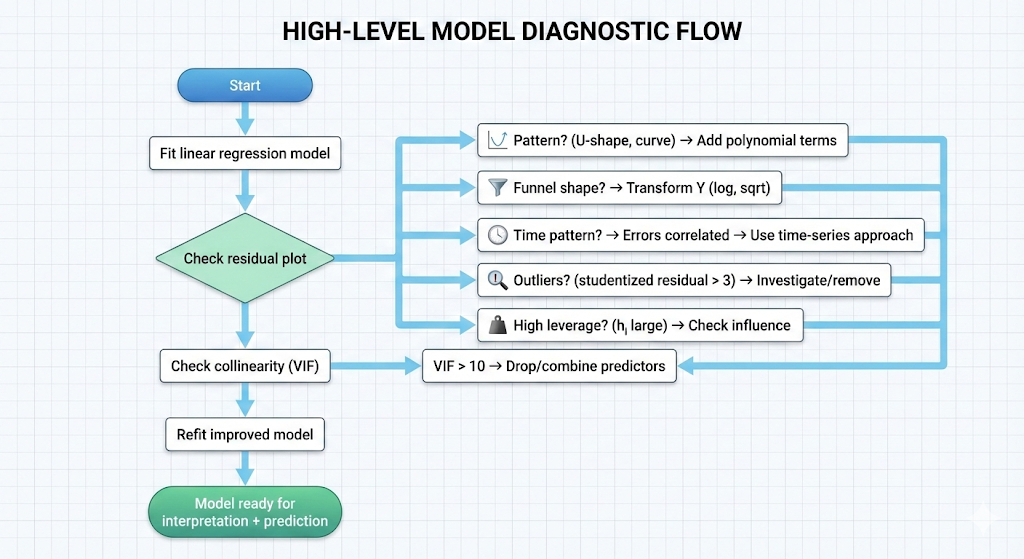

# 📝 FINAL STUDY NOTES (SHORT & SWEET)

• Use dummy variables for categories (k categories → k−1 dummies).  
• Use interactions when predictors amplify each other.  
• Use polynomial regression for curved patterns.  
• Always inspect residual plots — they tell you the truth.  
• Outliers affect the model vertically; leverage points affect it horizontally.  
• Collinearity makes coefficients unstable — check VIF.  
• Model diagnostics are not optional; they are essential.

🔥 Master these, and you understand 90% of practical regression modeling.
